In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
outlier_fraction = 0.01
df = pd.read_csv(os.getcwd()+"\\Data\\realKnownCause\\realKnownCause\\ambient_temperature_system_failure.csv")

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

<AxesSubplot:xlabel='timestamp'>

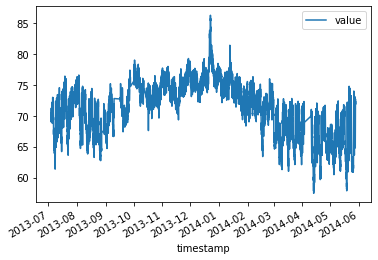

In [5]:
df.plot(x="timestamp",y="value")

<AxesSubplot:>

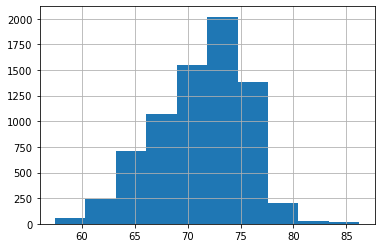

In [6]:
df["value"].hist()

In [7]:
df["hour"]=df["timestamp"].dt.hour
df["DayofWeek"] = df["timestamp"].dt.dayofweek

In [8]:
df['WeekDay'] = (df['DayofWeek'] < 5).astype(int)

In [9]:
df['daylight'] = ((df['hour'] >= 7) & (df['hour'] <= 22)).astype(int)

In [12]:
df["WeekDay"].value_counts()

1    5243
0    2024
Name: WeekDay, dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
data = df[["value","hour","DayofWeek","WeekDay","daylight"]]

In [38]:
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(data)

In [39]:
data=pd.DataFrame(scaled_data)

In [40]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)

In [41]:
dim_red_data = pc.fit_transform(data)

In [42]:
scaler = StandardScaler()

In [43]:
dim_red_data2 = scaler.fit_transform(dim_red_data)

In [47]:
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=4)

In [48]:
k_cluster.fit(dim_red_data2)

KMeans(n_clusters=4)

In [49]:
df["cluster_no"]=k_cluster.predict(dim_red_data2)

In [55]:
df["cluster_no"].value_counts()

1    3502
2    1741
0    1344
3     680
Name: cluster_no, dtype: int64

In [61]:
df["prin_feature1"] = pd.DataFrame(dim_red_data2)[0]

df["prin_feature2"] = pd.DataFrame(dim_red_data2)[1]

# dim_red_data2[1] 

In [64]:
colors = {0:'red', 1:'blue', 2:'green', 3:'pink'}

In [63]:
import seaborn as sns

C:\Users\vishalra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prin_feature1', ylabel='prin_feature2'>

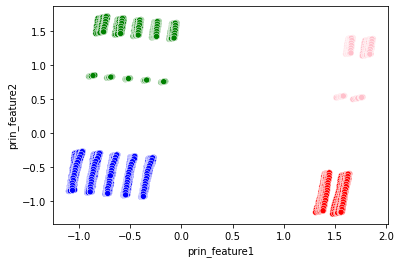

In [65]:
sns.scatterplot(df["prin_feature1"],df["prin_feature2"],c=df["cluster_no"].apply(lambda x:colors[x]))

In [85]:
# k_cluster.cluster_centers_[k_cluster.labels_]
# set(k_cluster.labels_)
k_cluster.labels_[7003]

0

In [72]:
df["cluster_no"].value_counts()

1    3502
2    1741
0    1344
3     680
Name: cluster_no, dtype: int64

In [77]:
k_cluster.cluster_centers_

array([[ 1.47877447, -0.88176759],
       [-0.68578961, -0.6112118 ],
       [-0.43432557,  1.44982161],
       [ 1.72106342,  1.17855871]])

In [79]:
df

,timestamp,value,hour,DayofWeek,WeekDay,daylight,cluster_no,prin_feature1,prin_feature2
0,2013-07-04 00:00:00,69.880835,0,3,1,0,2,-0.235858,1.636088
1,2013-07-04 01:00:00,71.220227,1,3,1,0,2,-0.245149,1.597195
2,2013-07-04 02:00:00,70.877805,2,3,1,0,2,-0.248571,1.560250
3,2013-07-04 03:00:00,68.959400,3,3,1,0,2,-0.246493,1.525131
4,2013-07-04 04:00:00,69.283551,4,3,1,0,2,-0.252241,1.487415
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,1,1,1,-0.673435,-0.479781
7263,2014-05-28 12:00:00,72.172956,12,2,1,1,1,-0.677364,-0.516894
7264,2014-05-28 13:00:00,72.046565,13,2,1,1,1,-0.681539,-0.554089
7265,2014-05-28 14:00:00,71.825226,14,2,1,1,1,-0.685384,-0.591174
